# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

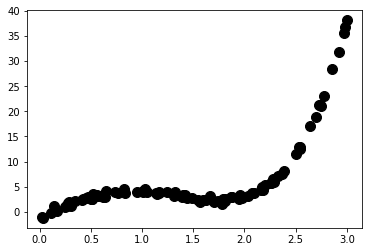

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 1.44642389e+00, -5.38902540e-01,  1.43616304e-01,  4.71585671e-01,
       -9.18366536e-01,  2.59897608e+01,  1.48941546e+00, -7.03037358e-01,
        2.73671710e+00,  4.39878946e+00,  8.32920995e-01,  3.88196880e+00,
        7.45554067e-01,  5.83056290e+00,  3.51293868e+00, -7.25679976e-01,
        1.56018333e+01, -9.18900992e-01, -7.03281364e-01,  9.60733915e+00,
        2.93580940e+00,  1.92921132e-01,  5.95067467e+00,  7.50622977e-01,
        1.63211771e+01,  2.42476286e-01,  3.55392635e+00,  2.10962548e+01,
        1.11510512e+01,  3.13335415e+00,  2.36215836e+00,  1.98640938e+00,
        8.94440957e+00,  5.03812737e-01,  3.85350472e+00,  8.35134407e-01,
        1.69632765e+00, -2.53959964e-02, -4.79559336e-01,  1.31711367e+01])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.6785937244140945
Explained variance score: 0.6785937244140945
Median absolute error: 2.8803586527224114
Mean squared error: 10.520408248141685
Mean absolute errors: 2.8355008029343507


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [10]:
for i in {2,3,4,5,25}:
    print(i,":")
    X_train=np.vstack(X_train)
    X_test=np.vstack(X_test)
    model2 = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
    model2.fit(X_train, y_train)
    model2.predict(X_test)
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

2 :
Explained variance score: 0.9137285949239008
Explained variance score: 0.9137285949239008
Median absolute error: 0.15093279261275416
Mean squared error: 0.049296458938460144
Mean absolute errors: 0.18851922075287864
3 :
Explained variance score: 0.9738779671107508
Explained variance score: 0.9738779671107508
Median absolute error: 0.08113554001196843
Mean squared error: 0.01571476171961742
Mean absolute errors: 0.09823442869417047
4 :
Explained variance score: 0.9504963128468786
Explained variance score: 0.9504963128468786
Median absolute error: 0.11355129858270158
Mean squared error: 0.03498796409604015
Mean absolute errors: 0.14672202053812172
5 :
Explained variance score: 0.3991116814591116
Explained variance score: 0.3991116814591116
Median absolute error: 0.16746736044705401
Mean squared error: 0.4948546732350092
Mean absolute errors: 0.44845452245785977
25 :
Explained variance score: -2917600837.4948287
Explained variance score: -2917600837.4948287
Median absolute error: 34.8